# Forecasting Time Series Data Using LSTM Recurrent Neural Networks 


In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# for reading stock data from yahoo
from pandas_datareader.data import DataReader

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# get the stock quote
df = DataReader('ZM', data_source='yahoo', start='2012-01-01', end='2020-04-30')

# show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000


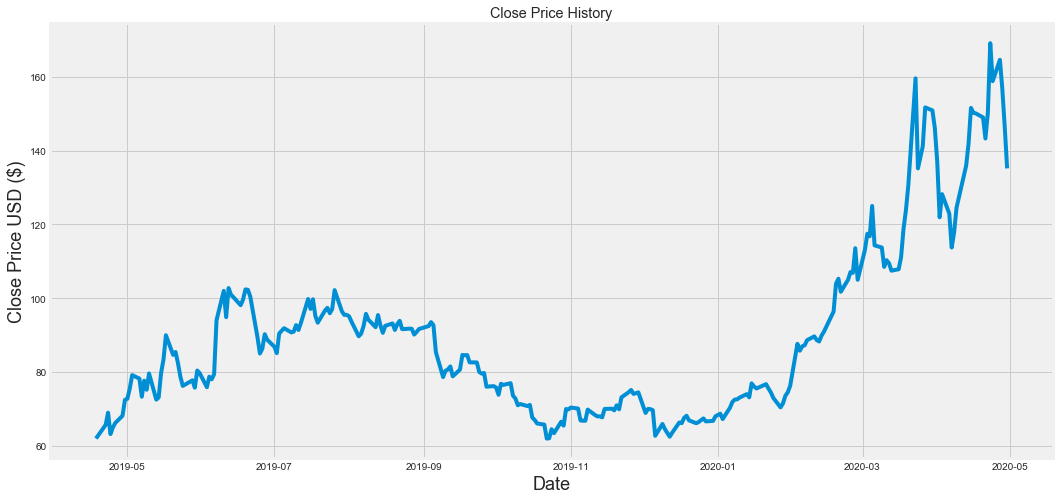

In [5]:
# plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show();

In [8]:
# create a new dataframe with only the Close column
data = df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values


In [9]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [11]:
# create the scaled training data set
training_data_len = int(np.ceil( len(dataset) * .8 ))
train_data = scaled_data[0:int(training_data_len), :]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [12]:
# convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(149, 60, 1)

In [14]:
# create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(52, 60, 1)

In [15]:
# import LSTM and related libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM

# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1));

Using TensorFlow backend.


In [16]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
149/149 [==============================] - 8s 56ms/step - loss: 0.0043
Epoch 2/10
149/149 [==============================] - 7s 49ms/step - loss: 0.0022
Epoch 3/10
149/149 [==============================] - 7s 48ms/step - loss: 0.0015
Epoch 4/10
149/149 [==============================] - 7s 49ms/step - loss: 0.0014
Epoch 5/10
149/149 [==============================] - 7s 49ms/step - loss: 0.0013
Epoch 6/10
149/149 [==============================] - 7s 50ms/step - loss: 0.0010
Epoch 7/10
149/149 [==============================] - 8s 51ms/step - loss: 0.0010
Epoch 8/10
149/149 [==============================] - 7s 50ms/step - loss: 9.3310e-04
Epoch 9/10
149/149 [==============================] - 7s 49ms/step - loss: 8.9446e-04
Epoch 10/10
149/149 [==============================] - 7s 49ms/step - loss: 8.4520e-04


In [18]:
# get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.180541638727416

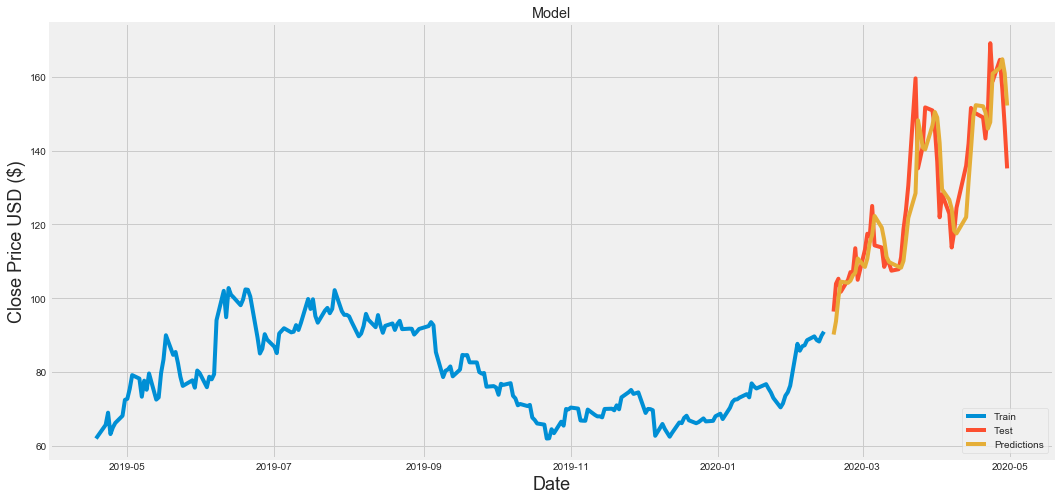

In [19]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show();